# Telecom Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['customerID'].duplicated().sum()

np.int64(0)

In [10]:
df.shape

(7043, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [13]:
df = df.drop(columns=['customerID'])
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [14]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [15]:
X.shape

(7043, 19)

In [16]:
y.value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [17]:
X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [19]:
X_train.shape

(5634, 19)

In [20]:
X_test.shape

(1409, 19)

In [21]:
y_train.value_counts(normalize=True)

Churn
No     0.734647
Yes    0.265353
Name: proportion, dtype: float64

In [22]:
y_test.value_counts(normalize=True)

Churn
No     0.734564
Yes    0.265436
Name: proportion, dtype: float64

In [23]:
cat_cols = X_train.select_dtypes(include='object').columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [24]:
X_train_encoded = pd.get_dummies(
    X_train,
    columns=cat_cols,
    drop_first=True,
    dtype = int
)
X_train_encoded.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,0,35,49.20,1701.65,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3151,0,15,75.10,1151.55,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4860,0,13,40.55,590.35,1,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [25]:
X_test_encoded = pd.get_dummies(
    X_test,
    columns=cat_cols,
    drop_first=True,
    dtype = int
)
X_test_encoded.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
437,0,72,114.05,8468.20,1,1,1,1,0,1,...,0,1,0,1,0,1,1,1,0,0
2280,1,8,100.15,908.55,0,0,0,1,0,1,...,0,1,0,1,0,0,1,1,0,0


In [26]:
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded,
    join='left',
    axis=1,
    fill_value=0
)

In [27]:
X_train_encoded.shape

(5634, 30)

In [28]:
X_test_encoded.shape

(1409, 30)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train_encoded)

In [32]:
X_test_scaled = scaler.transform(X_test_encoded)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_model = LogisticRegression(max_iter=1000)
log_model

LogisticRegression(max_iter=1000)

In [35]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_pred_log = log_model.predict(X_test_scaled)
print(y_pred_log)

['No' 'Yes' 'No' ... 'No' 'No' 'No']


In [37]:
from sklearn.metrics import accuracy_score
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_log

0.8069552874378992

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_log)

array([[925, 110],
       [162, 212]])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1035
         Yes       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model

DecisionTreeClassifier(random_state=42)

In [42]:
dt_model.fit(X_train_encoded, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
y_train_pred = dt_model.predict(X_train_encoded)
y_train_pred

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'],
      shape=(5634,), dtype=object)

In [44]:
y_test_pred = dt_model.predict(X_test_encoded)
y_test_pred

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'],
      shape=(1409,), dtype=object)

In [45]:
print("Train Accuracy for dt:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy for dt:", accuracy_score(y_test, y_test_pred))

Train Accuracy for dt: 0.9980475683351083
Test Accuracy for dt: 0.7260468417317246


In [46]:
confusion_matrix(y_test, y_test_pred)

array([[844, 191],
       [195, 179]])

In [47]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.81      0.82      0.81      1035
         Yes       0.48      0.48      0.48       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [48]:
dt_pruned = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42
)

dt_pruned.fit(X_train_encoded, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [49]:
y_train_pred_pruned = dt_pruned.predict(X_train_encoded)
y_train_pred_pruned

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(5634,), dtype=object)

In [50]:
y_test_pred_pruned = dt_pruned.predict(X_test_encoded)
y_test_pred_pruned

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'],
      shape=(1409,), dtype=object)

In [51]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_pruned))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_pruned))

Train Accuracy: 0.8068867589634363
Test Accuracy: 0.7998580553584103


In [52]:
print(confusion_matrix(y_test, y_test_pred_pruned))

[[942  93]
 [189 185]]


In [53]:
print(classification_report(y_test, y_test_pred_pruned))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1035
         Yes       0.67      0.49      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [54]:
param_grid = {
    "max_depth": [4, 6, 8, 10, None],
    "min_samples_split": [20, 50, 100],
    "min_samples_leaf": [10, 20, 50],
    "criterion": ["gini", "entropy"]
}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring="recall",   
    cv=5,
    n_jobs=-1
)

In [57]:
grid.fit(X_train_encoded, y_train)

C:\Users\Jyoti Bansal\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, None],
                         'min_samples_leaf': [10, 20, 50],
                         'min_samples_split': [20, 50, 100]},
             scoring='recall')

In [58]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 20}

In [59]:
best_dt = grid.best_estimator_
best_dt

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [60]:
y_test_pred_best = best_dt.predict(X_test_encoded)
y_test_pred_best

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'],
      shape=(1409,), dtype=object)

In [61]:
y_train_pred_best = best_dt.predict(X_train_encoded)

In [62]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_best))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_best))

Train Accuracy: 0.7921547745828896
Test Accuracy: 0.7955997161107168


In [63]:
print(confusion_matrix(y_test, y_test_pred_best))

[[929 106]
 [182 192]]


In [64]:
print(classification_report(y_test, y_test_pred_best))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1035
         Yes       0.64      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_encoded, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [66]:
y_train_pred_rf = rf_model.predict(X_train_encoded)
y_test_pred_rf = rf_model.predict(X_test_encoded)

In [67]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))

Train Accuracy: 0.9980475683351083
Test Accuracy: 0.7927608232789212


In [68]:
print(confusion_matrix(y_test, y_test_pred_rf))

[[926 109]
 [183 191]]


In [69]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1035
         Yes       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [70]:
rf_regularized = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=50,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_regularized.fit(X_train_encoded, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=50, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [71]:
y_train_pred_rf_reg = rf_regularized.predict(X_train_encoded)
y_test_pred_rf_reg = rf_regularized.predict(X_test_encoded)

In [72]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf_reg))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf_reg))

Train Accuracy: 0.7642882499112531
Test Accuracy: 0.752306600425834


In [73]:
print(confusion_matrix(y_test, y_test_pred_rf_reg))

[[760 275]
 [ 74 300]]


In [74]:
print(classification_report(y_test, y_test_pred_rf_reg))

              precision    recall  f1-score   support

          No       0.91      0.73      0.81      1035
         Yes       0.52      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409



In [75]:
y_test_proba = rf_regularized.predict_proba(X_test_encoded)
y_test_proba

array([[0.8758377 , 0.1241623 ],
       [0.21498917, 0.78501083],
       [0.75526246, 0.24473754],
       ...,
       [0.75154691, 0.24845309],
       [0.9324975 , 0.0675025 ],
       [0.9375647 , 0.0624353 ]], shape=(1409, 2))

In [76]:
y_test_churn_prob = y_test_proba[:, 1]
y_test_churn_prob

array([0.1241623 , 0.78501083, 0.24473754, ..., 0.24845309, 0.0675025 ,
       0.0624353 ], shape=(1409,))

In [77]:
threshold = 0.4
y_test_pred_04 = (y_test_churn_prob >= threshold).astype(int)
y_test_pred_04

array([0, 1, 0, ..., 0, 0, 0], shape=(1409,))

In [78]:
y_test_pred_04 = np.where(y_test_pred_04 == 1, 'Yes', 'No')
y_test_pred_04

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'],
      shape=(1409,), dtype='<U3')

In [79]:
print("Accuracy:", accuracy_score(y_test, y_test_pred_04))

Accuracy: 0.6926898509581263


In [80]:
print(confusion_matrix(y_test, y_test_pred_04))

[[646 389]
 [ 44 330]]


In [81]:
print(classification_report(y_test, y_test_pred_04))

              precision    recall  f1-score   support

          No       0.94      0.62      0.75      1035
         Yes       0.46      0.88      0.60       374

    accuracy                           0.69      1409
   macro avg       0.70      0.75      0.68      1409
weighted avg       0.81      0.69      0.71      1409



In [82]:
for t in [0.3, 0.4, 0.5]:
    y_pred = (y_test_churn_prob >= t).astype(int)
    y_pred = np.where(y_pred == 1, 'Yes', 'No')
    
    print(f"\nThreshold = {t}")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Threshold = 0.3
[[539 496]
 [ 31 343]]
Accuracy: 0.6259758694109298
              precision    recall  f1-score   support

          No       0.95      0.52      0.67      1035
         Yes       0.41      0.92      0.57       374

    accuracy                           0.63      1409
   macro avg       0.68      0.72      0.62      1409
weighted avg       0.80      0.63      0.64      1409


Threshold = 0.4
[[646 389]
 [ 44 330]]
Accuracy: 0.6926898509581263
              precision    recall  f1-score   support

          No       0.94      0.62      0.75      1035
         Yes       0.46      0.88      0.60       374

    accuracy                           0.69      1409
   macro avg       0.70      0.75      0.68      1409
weighted avg       0.81      0.69      0.71      1409


Threshold = 0.5
[[760 275]
 [ 74 300]]
Accuracy: 0.752306600425834
              precision    recall  f1-score   support

          No       0.91      0.73      0.81      1035
         Yes       0.52      0.

In [83]:
y_proba_rf = rf_regularized.predict_proba(X_test_encoded)[:, 1]
y_proba_rf

array([0.1241623 , 0.78501083, 0.24473754, ..., 0.24845309, 0.0675025 ,
       0.0624353 ], shape=(1409,))

In [84]:
y_test_binary = y_test.map({'No': 0, 'Yes': 1})

In [85]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba_rf)

In [86]:
from sklearn.metrics import roc_auc_score
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC AUC:", auc_rf)

ROC AUC: 0.8445645715466688


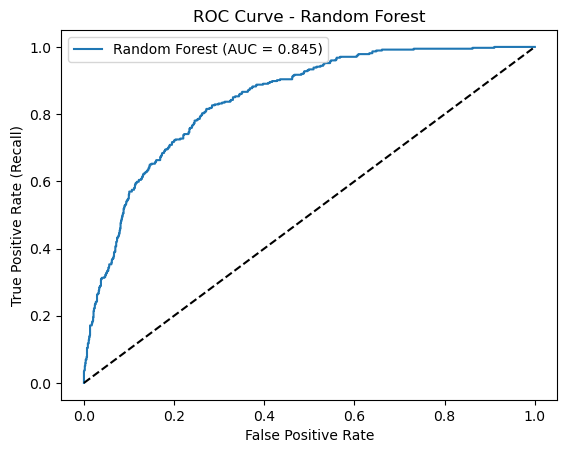

In [87]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot([0, 1], [0, 1], 'k--')   # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [88]:
# Logistic probabilities
y_proba_log = log_model.predict_proba(X_test_scaled)[:, 1]

In [89]:
# ROC + AUC
fpr_log, tpr_log, _ = roc_curve(y_test_binary, y_proba_log)
auc_log = roc_auc_score(y_test_binary, y_proba_log)

print("Logistic AUC:", auc_log)

Logistic AUC: 0.841778397788628


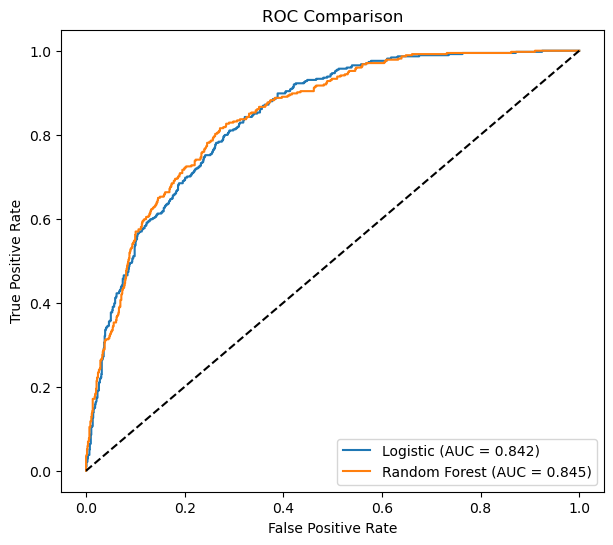

In [90]:
plt.figure(figsize=(7,6))

plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {auc_log:.3f})")
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_rf:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Comparison")
plt.legend()
plt.show()

In [91]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [92]:
# Logistic reg P-R
prec_log, rec_log, _ = precision_recall_curve(y_test_binary, y_proba_log)
ap_log = average_precision_score(y_test_binary, y_proba_log)
ap_log

np.float64(0.6323718834825269)

In [93]:
# Random forest P-R
prec_rf, rec_rf, _ = precision_recall_curve(y_test_binary, y_proba_rf)
ap_rf = average_precision_score(y_test_binary, y_proba_rf)
ap_rf

np.float64(0.6526556857974787)

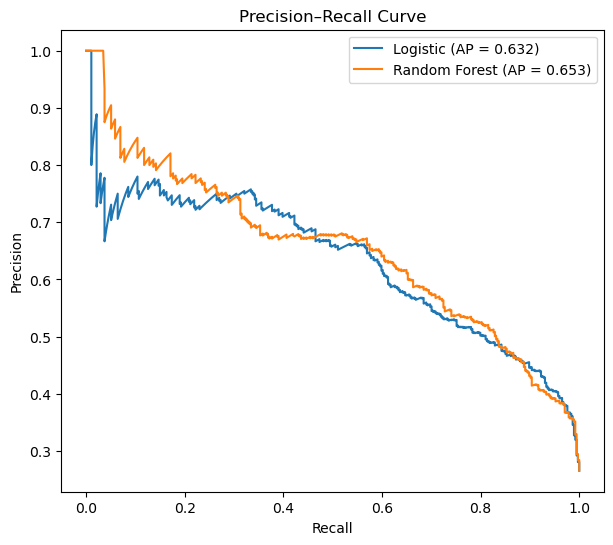

In [94]:
plt.figure(figsize=(7,6))

plt.plot(rec_log, prec_log, label=f"Logistic (AP = {ap_log:.3f})")
plt.plot(rec_rf, prec_rf, label=f"Random Forest (AP = {ap_rf:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()

In [97]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 5.1 MB/s eta 0:00:14
    --------------------------------------- 1.6/72.0 MB 4.5 MB/s eta 0:00:16
   - -------------------------------------- 2.4/72.0 MB 4.3 MB/s eta 0:00:17
   - -------------------------------------- 3.1/72.0 MB 4.0 MB/s eta 0:00:18
   -- ------------------------------------- 3.9/72.0 MB 3.8 MB/s eta 0:00:18
   -- ------------------------------------- 4.5/72.0 MB 3.8 MB/s eta 0:00:18
   -- ------------------------------------- 5.2/72.0 MB 3.7 MB/s eta 0:00:18
   --- ------------------------------------ 6.0/72.0 MB 3.8 MB/s eta 0:00:18
   --- ------------------------------------ 6.8/72.0 MB 3.8 MB/s eta 0:00:18
   ---- ----------------------------------- 7.9/72.0 MB 3.8 MB/s eta 0:00:17
   ---- ----------------------------------- 8.7/72.0 MB 3.9 MB/s eta 0:00:17
   ----- ---------------------------------- 9.4/72.0 MB 3.9 MB/s eta 0:00:17
   ---

In [98]:
import xgboost as xgb

In [99]:
from xgboost import XGBClassifier

In [100]:
scale_pos_weight = 1035 / 374

In [101]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42
)

In [105]:
xgb.fit(X_train_encoded, y_train_binary)

NameError: name 'y_train_binary' is not defined